### K-Means Clustering Algorithm

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import *
from sklearn.preprocessing import *
from sklearn.model_selection import *

from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",
                names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])

In [4]:
x = df.iloc[:, 0:2]
y = df.iloc[:, -1]

In [5]:
scaler = MinMaxScaler()
scaler.fit_transform(x)

array([[0.22222222, 0.625     ],
       [0.16666667, 0.41666667],
       [0.11111111, 0.5       ],
       [0.08333333, 0.45833333],
       [0.19444444, 0.66666667],
       [0.30555556, 0.79166667],
       [0.08333333, 0.58333333],
       [0.19444444, 0.58333333],
       [0.02777778, 0.375     ],
       [0.16666667, 0.45833333],
       [0.30555556, 0.70833333],
       [0.13888889, 0.58333333],
       [0.13888889, 0.41666667],
       [0.        , 0.41666667],
       [0.41666667, 0.83333333],
       [0.38888889, 1.        ],
       [0.30555556, 0.79166667],
       [0.22222222, 0.625     ],
       [0.38888889, 0.75      ],
       [0.22222222, 0.75      ],
       [0.30555556, 0.58333333],
       [0.22222222, 0.70833333],
       [0.08333333, 0.66666667],
       [0.22222222, 0.54166667],
       [0.13888889, 0.58333333],
       [0.19444444, 0.41666667],
       [0.19444444, 0.58333333],
       [0.25      , 0.625     ],
       [0.25      , 0.58333333],
       [0.11111111, 0.5       ],
       [0.

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state= 42)

In [7]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(x_train)

KMeans(n_clusters=3)

In [8]:
train_pred = kmeans.predict(x_train)
adjusted_rand_score(y_train, train_pred)

0.5767572546050133

In [9]:
centroids = kmeans.cluster_centers_
xCentroid = centroids[:,0]
yCentroid = centroids[:,1]

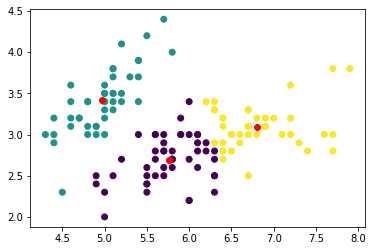

In [10]:
frame = pd.DataFrame(x_train)
frame['cluster'] = train_pred

plt.scatter(frame['sepal_length'], frame['sepal_width'], c=frame['cluster'])
plt.scatter(xCentroid, yCentroid, c='red')

In [11]:
test_pred = kmeans.predict(x_test)
adjusted_rand_score(y_test, test_pred)

0.8202824133504493